#  Larminie-Dicks Static Model

### Version 0.9

<p style="text-align:justify;">
Larminie-Dicks model is obtained for large variation of the load parameters. In this model, the fuel cell is represented by means of its voltage–current characteristic obtained in static operating mode. In fact, Larminie-Dicks static model presents the fuel cell voltage as a function of the current magnitude. The obtained polarization curve is composed of three main regions corresponding to the predominance of electrochemical activation phenomena (region I), a linear part (region II) where the voltage drop is mainly due to electronic and ionic internal resistances and the last region where the diffusion kinetics of gases through the electrodes becomes the limiting factor (region III). This last zone is characterized by a rapid voltage fall.
It has to be noted that this curve is common to all fuel cells and consequently no units are depicted on it.
</p>

<div style="text-align:center;">
   
<img src="images/Static-Model-Graphic.jpg">  
<p style="text-align:center;">Fig1. Graphical Abstract of Static Models</p>
</div>

## Vcell

$$V_{cell}=E_0-A\times ln(\frac{i+i_n}{i_0})-R_m\times (i+i_n)+B\times ln(1-\frac{i+i_n}{i_L})$$


In [1]:
from opem.Static.Larminie_Dicks import Vcell_Calc
Vcell=Vcell_Calc(E0=1.178, i=1,i_0=0.00654,i_n=0.23 ,i_L=100.0 ,R_M=0.0018,A=0.0587,B=0.0517)
Vcell

0.8677440917797067

* Notice : from opem.Larminie_Dicks in version (0.3>)

### VStack

$$V_{Stack}=N\times V_{cell}$$

In [2]:
from opem.Static.Larminie_Dicks import VStack_Calc
VStack=VStack_Calc(Vcell=Vcell,N=23)
VStack

19.958114110933252

## Power Of PEMFC

$$P=V_{cell}\times i$$

$$P_{Stack}=N\times P$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [3]:
from opem.Static.Larminie_Dicks import Power_Calc,PowerStack_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=Vcell,i=2)
Power

1.7354881835594134

In [4]:
PowerStack_Calc(Power=Power,N=23)

39.916228221866504

In [5]:
Power_Thermal_Calc(VStack=VStack,N=23,i=2)

16.663771778133494

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{cell}}{HHV}$$

In [6]:
from opem.Static.Larminie_Dicks import Efficiency_Calc
Efficiency_Calc(Vcell=Vcell)

0.5562462126792992

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0 to `i`=4 with `step`=0.1

In [7]:
Test_Vector={"A":0.0587,"E0":1.178,"B":0.0517,"RM":0.0018,"i_0":0.00654,"i_L":100.0,"i_n":0.23,"N":23,"i-start":0.1,"i-stop":4,"i-step":0.1,"Name":"Test"}

* Notice : "Name", new in version 0.5

In [8]:
from opem.Static.Larminie_Dicks import Static_Analysis
Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=False)

{'EFF': [0.6070918465825977,
  0.596983288796134,
  0.5889668542476844,
  0.5823143704480743,
  0.576622053314997,
  0.5716425142657562,
  0.5672131517182866,
  0.5632213484876261,
  0.5595858755325545,
  0.5562462126792992,
  0.5531560572234717,
  0.5502791922121564,
  0.5475867544887774,
  0.5450553693735705,
  0.5426658416714328,
  0.5404022150580957,
  0.5382510820424253,
  0.536201068437617,
  0.5342424419218519,
  0.532366810486187,
  0.5305668870842597,
  0.5288363037744284,
  0.527169463367337,
  0.5255614198480028,
  0.5240077811244296,
  0.5225046292799733,
  0.52104845467996,
  0.5196361011410657,
  0.5182647200068938,
  0.5169317314482642,
  0.515634791665824,
  0.514371764946645,
  0.5131406997374682,
  0.5119398080610783,
  0.5107674477304784,
  0.5096221069165698,
  0.5085023907052405,
  0.5074070093438323,
  0.5063347679284521],
 'I': [0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  1.1,
  1.2,
  1.3,
  1.4,
  1.5,
  1.6,
  1.7,
  1.8,
  1.9,
  2.0

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [9]:
Data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Larminie-Dicks-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [10]:
Static_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Larminie-Dicks Simulation Failed!(Check Your Inputs)',
 'Status': False}

## Plot

In [11]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

In [12]:
def plot_func(x,y,x_label,y_label,color='green'):
    plt.figure()
    plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


In [13]:
Test_Vector = {
    "A": 0.0587,
    "E0": 1.178,
    "B": 0.0517,
    "RM": 0.0018,
    "i_0": 0.00654,
    "i_L": 100.0,
    "i_n": 0.23,
    "N": 23,
    "i-start": 0.1,
    "i-stop": 98,
    "i-step": 0.1,
    "Name": "Larminiee_Test"}
data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=True)

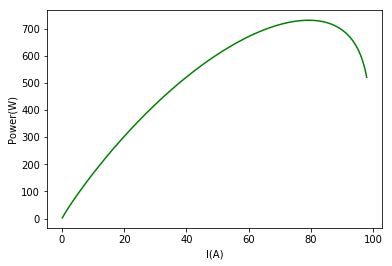

In [14]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

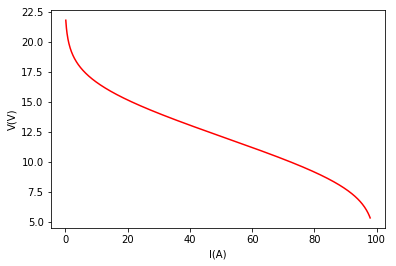

In [15]:
plot_func(data["I"],data["V"],"I(A)","V(V)","red")

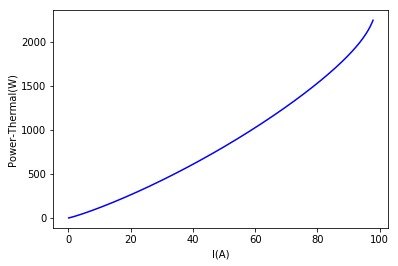

In [16]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

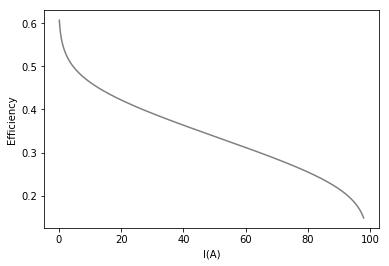

In [17]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

<a href="Larminie-Dicks/Larminiee_Test.html">HTML File</a>

<a href="Larminie-Dicks/Larminiee_Test.opem">OPEM File</a>

<a href="Larminie-Dicks/Larminiee_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User Input
2. System : Simulator Calculation (Middle Value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">Fuel Cell reversible no loss voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">The slope of the Tafel line</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_n$$</td>
        <td style="text-align:center;">Internal current</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_0$$</td>
        <td style="text-align:center;">Exchange current at which the overvoltage begins to move
from zero</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_L$$</td>
        <td style="text-align:center;">Limiting current</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Constant in the mass transfer term </td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R_m$$</td>
        <td style="text-align:center;">The membrane and contact resistances</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
    
    
    
    <tr>
        <td>$$N$$</td>
        <td style="text-align:center;">Number of single cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
         <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher Heating Value Potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical Potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
I. Sadli, P. Thounthong, J.-P. Martin, S. Rael, B. Davat. 2006.
"Behaviour of a PEMFC supplying a low voltage static converter."
Journal of Power Sources (Elsevier) 156: 119–125.
doi:10.1016/j.jpowsour.2005.08.021.
</blockquote>